#Flight Fare Prediction Using AutoML

###Importing Libraries

In [28]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_data=pandas.read_csv('flight data.csv')
df_test=pandas.read_csv('flight test.csv')

In [30]:
df_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [31]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [32]:
total_df=df_data.append(df_test, sort=False)

In [106]:
total_df.head(2)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,STOP,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4


In [35]:
total_df.shape

(13354, 11)

In [36]:
df_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#Exploratory Analysis

### Visualizing Price of each airline

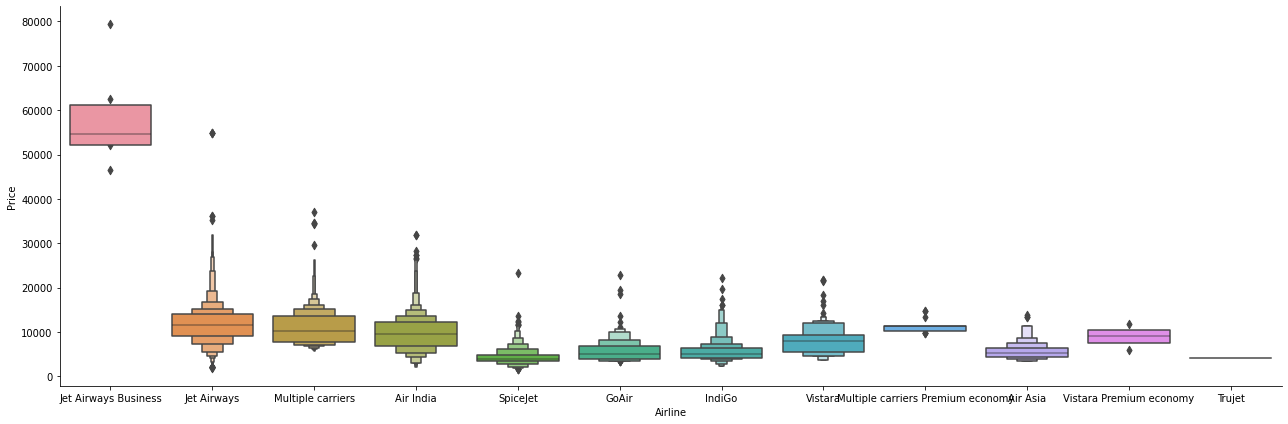

In [37]:
sns.catplot(y='Price', x='Airline', data=df_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

##Feature Engineering

In [40]:
total_df['Date']=total_df['Date_of_Journey'].str.split('/').str[0]
total_df['Month']=total_df['Date_of_Journey'].str.split('/').str[1]
total_df['Year']=total_df['Date_of_Journey'].str.split('/').str[2]

In [41]:
total_df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [42]:
total_df['Date']=total_df['Date'].astype(int)
total_df['Year']=total_df['Year'].astype(int)
total_df['Month']=total_df['Month'].astype(int)

In [43]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


##Effect of class of airline on price

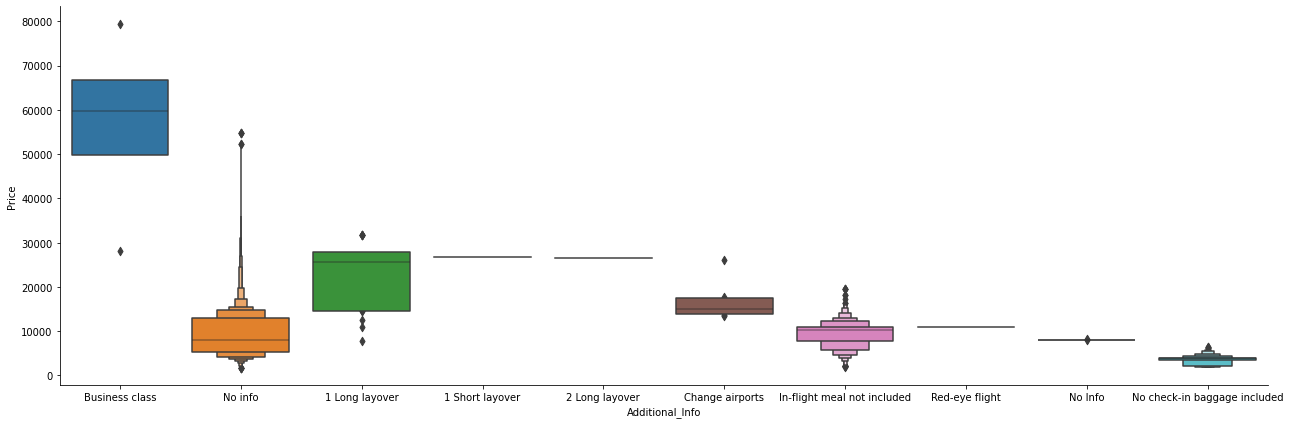

In [44]:
sns.catplot(y='Price', x='Additional_Info', data=df_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

###Filtering the arrival time

In [45]:
total_df['Arrival_Time']=total_df['Arrival_Time'].str.split(' ').str[0]


In [46]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [47]:
total_df['Total_Stops']=total_df['Total_Stops'].fillna('1 stop')

In [48]:
total_df['Total_Stops'].isna().sum()

0

In [49]:
total_df['Total_Stops']=total_df['Total_Stops'].replace('non-stop', '0 stop')

In [50]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [51]:
total_df['STOP']=total_df['Total_Stops'].str.split(' ').str[0]
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,STOP
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [52]:
total_df.drop(['Total_Stops'], axis=1, inplace=True)

In [53]:
total_df['STOP']=total_df['STOP'].astype(int)

###Converting to numeric data

In [54]:
total_df['Arrival_Hour'] = total_df['Arrival_Time'] .str.split(':').str[0]
total_df['Arrival_Minute'] = total_df['Arrival_Time'] .str.split(':').str[1]

In [55]:
total_df['Arrival_Hour']=total_df['Arrival_Hour'].astype(int)
total_df['Arrival_Minute']=total_df['Arrival_Minute'].astype(int)
total_df=total_df.drop(['Arrival_Time'],axis=1)

In [56]:
total_df['Departure_Hour'] = total_df['Dep_Time'] .str.split(':').str[0]
total_df['Departure_Minute'] = total_df['Dep_Time'] .str.split(':').str[1]

In [57]:
total_df['Departure_Hour']=total_df['Departure_Hour'].astype(int)
total_df['Departure_Minute']=total_df['Departure_Minute'].astype(int)
total_df=total_df.drop(['Dep_Time'],axis=1)

In [107]:
total_df.head(2)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,STOP,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4


###Dividing the routes

In [59]:
total_df['Route_1']= total_df['Route'].str.split('→ ').str[0]
total_df['Route_2']= total_df['Route'].str.split('→ ').str[1]
total_df['Route_3']= total_df['Route'].str.split('→ ').str[2]
total_df['Route_4']= total_df['Route'].str.split('→ ').str[3]
total_df['Route_5']= total_df['Route'].str.split('→ ').str[4]

In [60]:
total_df['Route_1'].fillna("None",inplace=True)
total_df['Route_2'].fillna("None",inplace=True)
total_df['Route_3'].fillna("None",inplace=True)
total_df['Route_4'].fillna("None",inplace=True)
total_df['Route_5'].fillna("None",inplace=True)

In [61]:
total_df=total_df.drop(['Route'],axis=1)
total_df=total_df.drop(['Duration'],axis=1)


In [62]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,STOP,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


###Imputing the null values in the price column with mean

In [63]:
total_df.isna().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
STOP                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

In [64]:
total_df['Price'].fillna((total_df['Price'].mean()),inplace=True)

In [ ]:
total_df.isna().sum()

###Label Encoding of the categorical data

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label=LabelEncoder()

In [68]:
total_df["Airline"]=label.fit_transform(total_df['Airline'])
total_df["Source"]=label.fit_transform(total_df['Source'])
total_df["Destination"]=label.fit_transform(total_df['Destination'])
total_df["Additional_Info"]=label.fit_transform(total_df['Additional_Info'])
total_df["Route_1"]=label.fit_transform(total_df['Route_1'])
total_df["Route_2"]=label.fit_transform(total_df['Route_2'])
total_df["Route_3"]=label.fit_transform(total_df['Route_3'])
total_df["Route_4"]=label.fit_transform(total_df['Route_4'])
total_df["Route_5"]=label.fit_transform(total_df['Route_5'])

In [108]:
total_df.head(2)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,STOP,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4


In [70]:
total_df.drop(['Year'], axis=1, inplace=True)

In [71]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,STOP,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,1,21,35,16,50,0,34,8,12,4


##Feature Selection

In [72]:
X=total_df.drop(['Price'], axis=1)
y=total_df['Price']

In [73]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import  SelectFromModel

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [75]:
model=SelectFromModel(Lasso(alpha=0.005, random_state=0))
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [76]:
selected_features=X_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'STOP', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

#Machine Learning Algorithms

###Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor()
regressor_rf.fit(X_train,y_train)

RandomForestRegressor()

In [80]:
y_pred_rf=regressor_rf.predict(X_test)

In [81]:
regressor_rf.score(X_train,y_train)

0.9478123572608883

In [82]:
regressor_rf.score(X_test,y_test)

0.6051225497482603

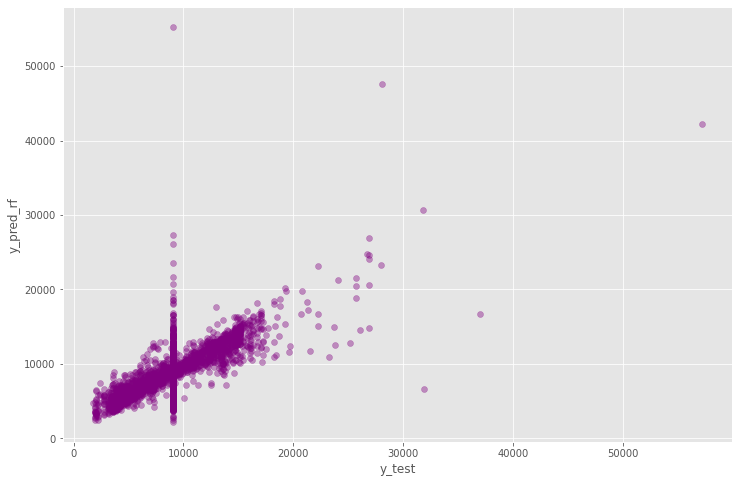

In [83]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred_rf, alpha = 0.4,color='purple')
plt.xlabel("y_test")
plt.ylabel("y_pred_rf")
plt.show()

In [84]:
from sklearn import metrics

In [85]:
metrics.r2_score(y_test, y_pred_rf)

0.6051225497482603

###Hypertuning our model

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)],
            'max_features':['auto', 'sqrt'],
            'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
            'min_samples_split':[2, 3, 5, 7, 10, 15, 100],
            'min_samples_leaf':[1, 2,3, 5,8, 10] }

In [88]:
random_rf=RandomizedSearchCV(estimator=regressor_rf, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 3)

In [89]:
regressor_rf = RandomForestRegressor(n_estimators= 700,
 min_samples_split=3,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 15)

In [90]:
regressor_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [91]:
y_pred_rf=regressor_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


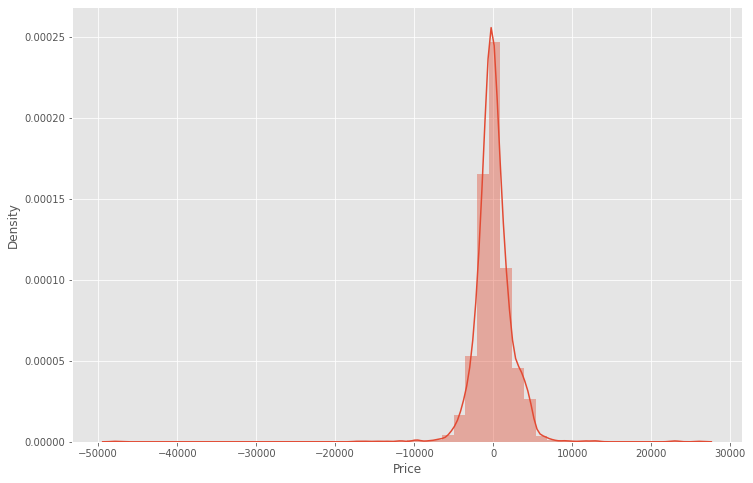

In [92]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred_rf)
plt.show()

In [94]:
r2_score(y_test, y_pred_rf)

0.6120457574634425

#Auto SK Learn

In [95]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 22 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (826 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 123941 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpack

In [97]:
import autosklearn.regression as reg

In [98]:
df=pandas.read_csv('flight data.csv')

In [110]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [100]:
automl=reg.AutoSklearnRegressor(time_left_for_this_task=120,per_run_time_limit=30)

In [101]:
automl.fit(X_train,y_train)

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=30, time_left_for_this_task=120)

In [102]:
y_pred_automl= automl.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


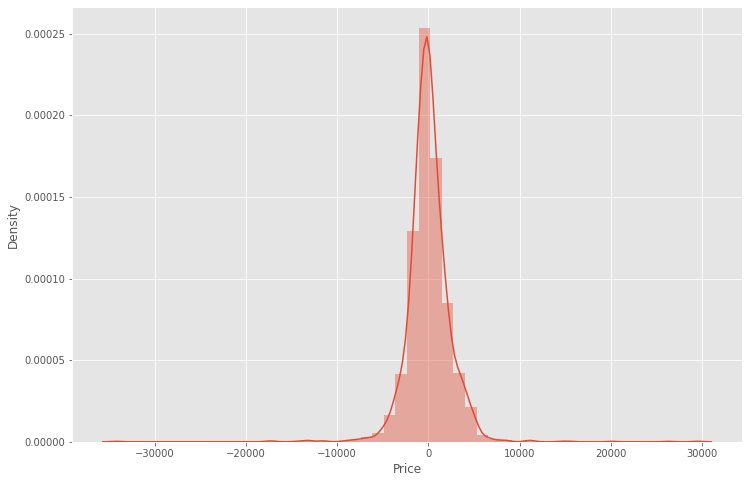

In [103]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred_automl)
plt.show()

In [112]:
from sklearn.metrics import r2_score

In [113]:
r2_score(y_test, y_pred_automl)

0.6230249965528629

#Out of the models implemented, the accuracy provided by autosklearn model is the highest. Though hypertuning the model improved the efficiency by a slight amount, autosklearn model give the best results.